In [1]:
import pandas as pd
import numpy as np

cars = pd.read_csv("imports-85.data",header=None)

col = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 
           'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 
           'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 
           'highway-mpg', 'price']

cars.columns = col


# Analysing the data set

In [2]:
print(cars.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compressi

In [3]:
print(len(cars[cars["normalized-losses"]=="?"]))

41


In [4]:
print(len(cars))

205


In [5]:
print(cars.describe())

        symboling  wheel-base      length       width      height  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   205.000000   205.000000         205.000000  205.000000   205.000000  
mean   2555.565854   126.907317          10.142537   25.219512    30.751220  
std     520.680204    41.642693           3.972040    6.542142     6.886443  
min    1488.000000    61.000000           7.000000   13.000000    

In [6]:
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

Numeric Column
----------------

Lets us find out the numeric columns. First five of type int64, next five of type float64

* symboling
* curb-weight
* engine-size
* city-mpg
* highway-mpg
* wheel-base
* length
* width
* height
* compression-ratio


Target Column
---------------

The column *price*, which is not in numeric is our target coloumn. We will convert this column


Similerly there are other columns which are not in numeric format, but can be converted to the numeric format. Then, it can be used to predict the values in the target column.


The columns which consist of numerical values in String format
------------------------------------------------------------------------

 * normalized-losses 
 * bore 
 * stroke
 * horsepower
 * peak-rpm

The columns which consist of numerical values written in words, again in string format.
-----------------------------------------------------------------------

* num-of-doors values - four, two; can be considered for usage as feature
* body-style values - four, two; can be considered for usage as feature
* num-of-cylinders  values - eight, five, four, six, three, twelve, two


Columns which are not numerical
-----------------------------------

* make values - audi, bmw, etc


# Data Cleaning

Select only numeric columns with continous values.

In [7]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[continuous_values_cols]

In [8]:
numeric_cars = numeric_cars.replace('?',np.nan)

In [9]:
numeric_cars = numeric_cars.astype('float')

In [10]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [11]:
# Remove rows having missing 'price' values

numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [12]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [13]:
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
priceCol = numeric_cars["price"]

numeric_cars = (numeric_cars.max()-numeric_cars)/numeric_cars.max()

In [15]:
numeric_cars["price"] = priceCol

In [16]:
numeric_cars

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,13495.0
1,0.523438,0.267163,0.188852,0.109722,0.183946,0.373340,0.119289,0.357314,0.608696,0.576336,0.242424,0.571429,0.500000,16500.0
2,0.523438,0.218362,0.177319,0.090278,0.123746,0.305706,0.319797,0.167866,0.608696,0.412214,0.242424,0.612245,0.518519,16500.0
3,0.359375,0.174524,0.151370,0.080556,0.091973,0.425234,0.190355,0.184652,0.565217,0.610687,0.166667,0.510204,0.444444,13950.0
4,0.359375,0.177833,0.151370,0.077778,0.091973,0.305460,0.190355,0.184652,0.652174,0.561069,0.166667,0.632653,0.592593,17450.0
5,0.523438,0.174524,0.148006,0.079167,0.112040,0.383424,0.190355,0.184652,0.630435,0.580153,0.166667,0.612245,0.537037,15250.0
6,0.382812,0.124897,0.074003,0.008333,0.068562,0.300541,0.190355,0.184652,0.630435,0.580153,0.166667,0.612245,0.537037,17710.0
7,0.523438,0.124897,0.074003,0.008333,0.068562,0.273487,0.190355,0.184652,0.630435,0.580153,0.166667,0.612245,0.537037,18920.0
8,0.382812,0.124897,0.074003,0.008333,0.065217,0.241023,0.205584,0.184652,0.639130,0.465649,0.166667,0.653061,0.629630,23875.0
10,0.250000,0.162945,0.150408,0.100000,0.091973,0.410969,0.111675,0.328537,0.617391,0.614504,0.121212,0.530612,0.462963,16430.0


### UniVariate model

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(trainColName,testColName,df):
   
    
    np.random.seed(1)
    indexes = np.random.permutation(df.index)
    
    rand_df = df.reindex(indexes)
    
    dfSize = len(rand_df)
    
    
    #Get the middle index
    
    mid = int(dfSize/2)
    
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    #Create a new KNN model
    knn = KNeighborsRegressor()
    
    knn.fit(train_df[[trainColName]],train_df[testColName])
    
    prediction = knn.predict(test_df[[trainColName]])
    
    mse = mean_squared_error(test_df[testColName], prediction)
    
    return (mse ** (1/2))


cols = list(numeric_cars.columns)
cols.remove('price')

rmseVals = {}

for col in cols:
    rmseVal =  knn_train_test(col,'price',numeric_cars)
    rmseVals[col] = rmseVal


rmse_series = pd.Series(rmseVals)
rmse_series.sort_values()


    

horsepower           4007.472352
curb-weight          4437.934395
highway-mpg          4579.037250
width                4644.898429
city-mpg             4729.673421
length               5382.671155
wheel-base           5527.682489
compression-ratio    6736.676353
bore                 6816.853712
height               7487.652519
peak-rpm             7498.746475
normalized-losses    7635.170416
stroke               8078.491289
dtype: float64

It looks like, the column which gave the most accurate prediction is 'horsepower' column. Others like 
* curb-weight
* highway-mpg

also gave decent predictions.

Now we update the function to include k values as wel.

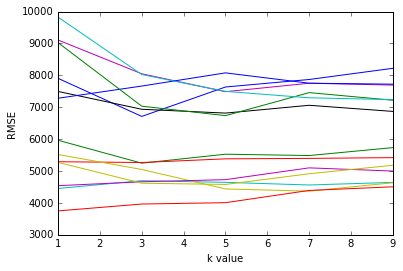

In [18]:
def knn_train_test(trainColName,testColName,df,k):
    
    
    
    np.random.seed(1)
    indexes = np.random.permutation(df.index)
    
    rand_df = df.reindex(indexes)
    
    dfSize = len(rand_df)
    
    
    #Get the middle index
    
    mid = int(dfSize/2)
    
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    #Create a new KNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(train_df[[trainColName]],train_df[testColName])
    
    prediction = knn.predict(test_df[[trainColName]])
    
    mse = mean_squared_error(test_df[testColName], prediction)
    
    return (mse ** (1/2))




import matplotlib.pyplot as plt
%matplotlib inline

rmseValCol = {}


for col in cols:
    kvalues = [1,3,5,7,9]
    rmseValues = []
    for k in kvalues:
        rmseVal =  knn_train_test(col,'price',numeric_cars,k)
        rmseValues.append(rmseVal)
    rmseValCol[col] = rmseValues
    plt.plot(kvalues,rmseValues)
    #plt.show()

plt.xlabel('k value')
plt.ylabel('RMSE')
plt.show()




### Multivariate model

In [19]:
# Finding the average value across all n's for each column

avRmseCol = {}

for col in cols:
    colMean = np.mean(rmseValCol[col])
    avRmseCol[col] = colMean
    
featureRmseCol = pd.Series(avRmseCol)
featureRmseCol.sort_values()


horsepower           4123.737847
width                4600.272698
curb-weight          4801.395999
city-mpg             4806.213763
highway-mpg          4912.751353
length               5351.716651
wheel-base           5591.790931
bore                 7036.356112
compression-ratio    7494.726126
normalized-losses    7669.373476
stroke               7700.844238
peak-rpm             7977.094835
height               8019.108269
dtype: float64

In [22]:
def knn_train_test(trainColNames,testColName,df,k):
   
    
    np.random.seed(1)
    indexes = np.random.permutation(df.index)
    
    rand_df = df.reindex(indexes)
    
    dfSize = len(rand_df)
    
    
    #Get the middle index
    
    mid = int(dfSize/2)
    
    train_df = rand_df.iloc[0:mid]
    test_df = rand_df.iloc[mid:]
    
    #Create a new KNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    
    knn.fit(train_df[trainColNames],train_df[testColName])
    
    prediction = knn.predict(test_df[trainColNames])
    
    mse = mean_squared_error(test_df[testColName], prediction)
    
    return (mse ** (1/2))

# best k is 5

# Best 2 features
best2 = ['horsepower','width']

rmse2 = knn_train_test(best2,'price',numeric_cars,5)
rmseMulti['best2'] = rmse2


# Best 3 features
best3 = ['horsepower','width','curb-weight']

rmse3 = knn_train_test(best3,'price',numeric_cars,5)
rmseMulti['best3'] = rmse3



# Best 4 features
best4 = ['horsepower','width','curb-weight','city-mpg']

rmse4 = knn_train_test(best4,'price',numeric_cars,5)
rmseMulti['best4'] = rmse4


# Best 5 features
best5 = ['horsepower','width','curb-weight','city-mpg','highway-mpg']

rmse5 = knn_train_test(best5,'price',numeric_cars,5)
rmseMulti['best5'] = rmse5

rmseMulti


{'best2': 3681.3980922556266,
 'best3': 3212.5596306057919,
 'best4': 3232.1036292326721,
 'best5': 3346.6737097607775}

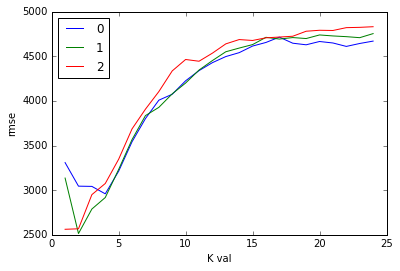

In [26]:
propertyParams = [best3,best4,best5]

for count,propColumns in enumerate(propertyParams):
    xval = []
    yval = []
    for k in np.arange(1,25):
        rmse = knn_train_test(propColumns,'price',numeric_cars,k)
        yval.append(rmse)
        xval.append(k)
        
    plt.plot(xval,yval,label=count)
    
plt.xlabel('K val')
plt.ylabel('rmse')
plt.legend(loc="upper left")
plt.show()

This shows that error is very less for best4 